In [244]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy
from scipy.linalg import hilbert
from scipy.linalg import lu
from scipy import linalg as LA

In [245]:
def regularfalsi(f,a,b,tol):
    zahler=1
    condition = True
    
    while condition:
        test = a-(f(a)*(b-a)/(f(b)-f(a)))
        # print(f'Iteration {zahler}: {test}')
        
        if f(a)*f(test)<0:
            b = test
        else:
            a = test
        zahler += 1
        condition = abs(f(test))>tol
    return test

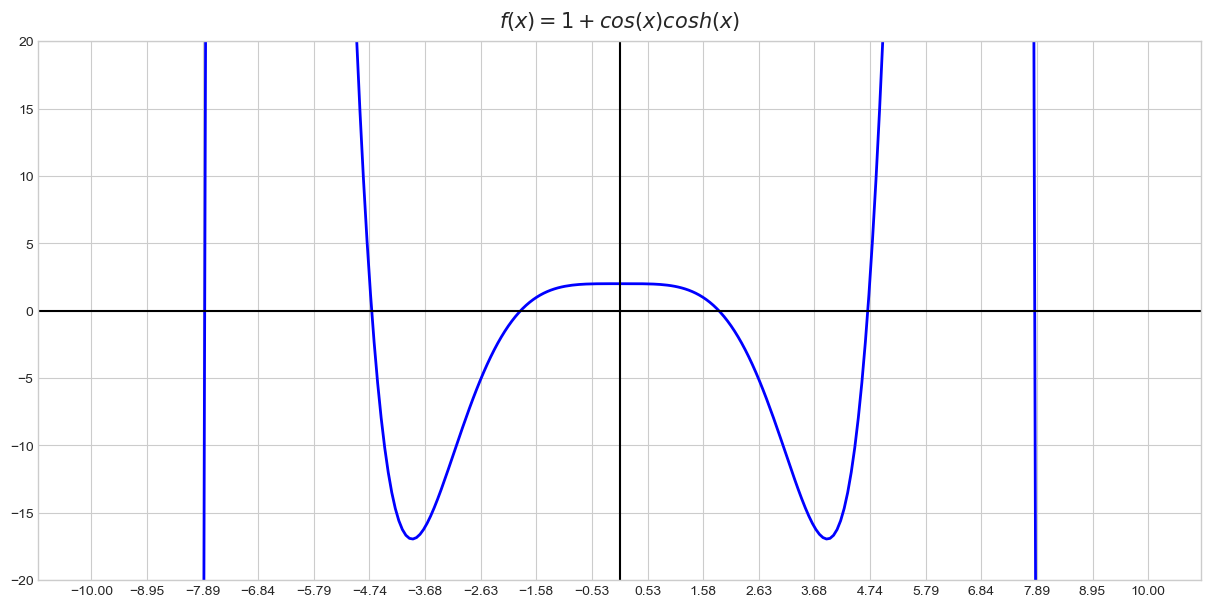

Bei den gewählten Parametern ist eine Nullstelle auf zehn Stellen zu 1.8751040687 angenährt.


In [246]:
# Funktion definieren
def f(x):
    y = 1+(np.cos(x)*np.cosh(x))
    return y

# Funktionsplott der Funktion f(x) = 1 + cos(x)*cosh(x)

x = np.linspace(-10,10,300)

plt.style.use('seaborn-whitegrid')
f1 =plt.figure(figsize=(15,7))

plt.plot(x, 1+(np.cos(x)*np.cosh(x)), color = 'blue', linewidth=2)

#Plot Einstellungen
plt.ylim(-20, 20) # Wertebereich
x_ticks=np.linspace(-10,10,20)
plt.xticks(ticks=x_ticks)
plt.title('$f(x) = 1 + cos(x)cosh(x)$', pad=10, fontsize=15)
plt.axvline(x=0, color='black', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(True,linestyle='-') # Hintergrundgitter

plt.show() 

# Aufruf der Funktion und Ausgabe des Ergebnisses
x = regularfalsi(f,1.58,2.63,1*10e-12) #um die 10te Stelle richtig zu haben muss die Toleranz größer als 10e-10 gewählt werden
print(f'Bei den gewählten Parametern ist eine Nullstelle auf zehn Stellen zu {x:2.10f} angenährt.')

# Auf 10 Stellen genau wäre:
# 1.8751040687 062754

### Einschub (Theorieaufgabe 3c)

- Ausgabe auf min. 15 Stellen erweitern
- ggf runden
- (Wann ist ein Duchgang zuende? Meine Annahme: Wenn man 5 das erste mal eingesetzt, hat ist ein Durchgang abgeschlossen.)
- Ergebnis überprüfen (Anzahl der Durchgänge)

In [247]:
tol = 10e-16

# Iterationsverfahren (**)
x = np.zeros(1, dtype=np.double)
i = 0
a = 5
b = True
x[0] = 5


while b == True:
    x = np.append(x,0.5*(x[i]+(a)/(x[i]))-((x[i])**2-a)**2/(8*x[i]**3))
    if np.abs(x[i-1]-x[i])<tol:
        b = False
    i += 1
n = np.shape(x)
#print(x)
print("Iterationsverfahren:")
for h in range(1,n[0]):
    print(f'Nach dem {h} Iterationsschritt ist x = {x[h]:2.15f}')
print("\nFür das Ergebnis mit Iterationsverfahren braucht man",n[0]-1,"Durchläufe.\n\n")

# Newtonverfahren (*)
y = np.zeros(1, dtype=np.double)
y[0] = 5
i = 0
a = 5
c = True

while c == True: 
    y = np.append(y,(0.5*(y[i]+(a)/(y[i]))))
    if np.abs(y[i+1]-y[i])<tol:
        c = False
    i += 1
n = np.shape(y)

print("Newtonverfahren:")
for h in range(1,n[0]):
    print(f'Nach dem {h} Iterationsschritt ist x = {y[h]:2.15f}')
    # print("Nach dem",h, "Iterationsschritt ist x=",y[h])
print("\nFür das Ergebnis mit Newtonverfahren braucht man",n[0]-1,"Durchläufe.")

# Erwartetes Ergebnis:
# 2.2360679774 9978969640

Iterationsverfahren:
Nach dem 1 Iterationsschritt ist x = 2.600000000000000
Nach dem 2 Iterationsschritt ist x = 2.239508420573509
Nach dem 3 Iterationsschritt ist x = 2.236067981558060
Nach dem 4 Iterationsschritt ist x = 2.236067977499790
Nach dem 5 Iterationsschritt ist x = 2.236067977499790
Nach dem 6 Iterationsschritt ist x = 2.236067977499790

Für das Ergebnis mit Iterationsverfahren braucht man 6 Durchläufe.


Newtonverfahren:
Nach dem 1 Iterationsschritt ist x = 3.000000000000000
Nach dem 2 Iterationsschritt ist x = 2.333333333333333
Nach dem 3 Iterationsschritt ist x = 2.238095238095238
Nach dem 4 Iterationsschritt ist x = 2.236068895643363
Nach dem 5 Iterationsschritt ist x = 2.236067977499978
Nach dem 6 Iterationsschritt ist x = 2.236067977499790
Nach dem 7 Iterationsschritt ist x = 2.236067977499790

Für das Ergebnis mit Newtonverfahren braucht man 7 Durchläufe.


### Zweite Programmieraufgabe:

In [256]:
from scipy.constants import g # Erdbeschleunigung

# Federkraft 
def F(x):
    f1 = [[0,0], 10, 2]
    f2 = [[1,1], 10, 2]
    feder = [f1, f2]
    F = np.zeros((len(feder),len(feder)), dtype=np.double)
    for k in range(len(feder)):
        a = np.asarray(feder[k][0])
        s = feder[k][1]
        l = feder[k][2]
        F[k] = s*(((l)/(LA.norm(x-a,2)))-1)*(x-a)
    return F
    

# Jacobimatrix der Federkraft
def f(x):
    f1 = [[0,0], 10, 2]
    f2 = [[1,1], 10, 2]
    feder = [f1, f2]
    I = np.identity(2)
    f = np.zeros((len(feder),len(feder),len(feder)), dtype=float)

    for k in range(len(feder)):
        a = np.asarray(feder[k][0])
        s = feder[k][1]
        l = feder[k][2]
        xa = np.array([x-a])
        f[k] = (s*(((l/(LA.norm(xa,2)))-1)*I-(l*(xa.T@xa)/((LA.norm(xa,2))**3))))
    return f ######revisar formula de la matriz jacobiana, se debe trabajar con una forma vectorial
             # creo que si esta bien 

def Fgesamt(x):
    #Sume der Federkräfte
    m=1 # Masse
    Fk_ges = np.sum(F(x), axis=0)
    G = np.array([0, -m*g])
    return Fk_ges+G
    
def fgesamt(x):
    return np.sum(f(x), axis=0)

### revisar Newtonverfahren
def newtonverfahren(x0):
    x = np.zeros((1,2), dtype=np.double)
    x[0] = x0
    tol = 10e-10
    i = 0
    condition = True
    while condition : 
        x = np.append(x,[x[i]-LA.inv(fgesamt(x[i]))@Fgesamt(x[i])], axis= 0) 
        differenz =np.abs(x[i+1]-x[i]) 
        variable = differenz < tol
        condition1 = np.all(variable)
        if condition1:
            condition = False
        i += 1
    n = np.shape(x)
    return x[n[0]-1]

In [249]:
from scipy import optimize
x_probe1=np.array([0,-4])
scipy.optimize.newton(Fgesamt, x_probe)


array([ 0.87783198, -1.89698486])

In [257]:
x_probe1=np.array([0,-4])
new1= newtonverfahren(x_probe1)
print(f'Die erste angenäherte Nullstelle ist bei: x= {new1} und F(x)= ,{Fgesamt(new1)}\n')

x_probe2 = np.array([0,4])
new2 = newtonverfahren(x_probe2)
print(f'Die erste angenäherte Nullstelle ist bei: x= {new2} und F(x)= ,{Fgesamt(new2)}')

print("\nDas Sytem ist in mehreren unterschiedlichen Punkten im Raum in Ruhe. Durch die verschiedenen Startpunkte haben wir uns an unterschiedliche Gleichgewichtspunkte im Raum angenährt.")

Die erste angenäherte Nullstelle ist bei: x= [ 0.87783214 -1.89698462] und F(x)= ,[4.99600361e-16 8.88178420e-15]

Die erste angenäherte Nullstelle ist bei: x= [1.06060792 1.87803296] und F(x)= ,[4.44089210e-16 1.77635684e-15]

Das Sytem ist in mehreren unterschiedlichen Punkten im Raum in Ruhe. Durch die verschiedenen Startpunkte haben wir uns an unterschiedliche Gleichgewichtspunkte im Raum angenährt.


In [ ]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    
    compare=fgesamt(x_probe)
    variable = compare < tol
    condition = np.all(variable)
    
    
    if condition:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

x_probe = np.array([0,4])
# my_newton(Fgesamt,fgesamt,x_probe,10e-10)

In [ ]:
x_probe = np.array([0,-4])


compare=fgesamt(x_probe)
compare<0

variable = compare < 10e-10
condition = np.all(variable)
condition



False
